# 主要任務：MNIST手寫辨識
以下是NN神經網路的一種

# 介紹使用套件:KERAS(高階API)  +  TENSORFLOW


# Keras是什麼？
是一個高階程式碼API，用以建立深度學習的模型，進行訓練，評估模型，量測準確率，進行預測，與Tensorflow不同的是，Keras不用寫很多程式碼，就可建立深度學習模型。因為已經建立好架構，使用者只需要輸入參數就可以。

高階：封裝較多程式碼，較抽象 低階：需要較多實作

# tensorflow是什麼？
是端對端的開放原始碼平台,用以處理感知與語言理解的任務，名字來由是因為Tensor(張量)：多維陣列，計算使用有狀態的資料
流圖表示，是一個機器學習框架，可以支援各種深度學習（矩陣運算）演算法。

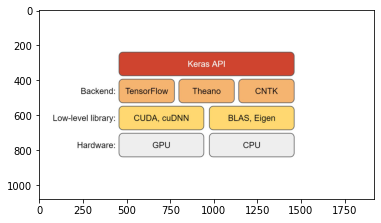

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #讀取圖片
img = mpimg.imread('6c3d4f5f-98e0-4104-ad8c-fb0b47000109.jpeg')

plt.imshow(img)

### Keras_backend是後端引擎，因為Keras是不處理低階運算:向量乘積與卷積，所以需要依靠後端引擎的幫助

In [1]:
#prepare data
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 輸入MNIST資料，MNIST資料是手寫辨識資料，總共60000筆訓練資料，
### 10000筆測試資料

In [3]:
from keras.datasets import mnist
import tensorflow as tf
import sys #
import pickle#

匯入資料 匯入gzip套件->開啟gz壓縮檔案 rb是讀取檔案

In [4]:
import gzip
f = gzip.open('mnist.pkl.gz', 'rb')#rb:binary mode read
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes') 
f.close()
(x_train, y_train), (x_test, y_test) = data

# 匯入的MNIST訓練資料:60000筆
# 匯入的MNIST測試資料:10000筆

In [5]:
len(x_train)
len(y_train)

60000

In [6]:
len(x_test)

10000

# 第9487筆訓練資料大小:28*28維

In [7]:
x_train[9487].shape

(28, 28)

In [8]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

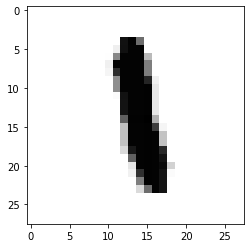

In [9]:
plt.imshow(x_train[9487],cmap='Greys')#颜色图谱（colormap), 默认绘制为RGB(A)颜色空间。

In [10]:
y_train[9487]

1

In [13]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


# 以下將圖片維度轉換成784維度，是為了輸入神經網路

In [14]:
#神經網路只吃平平的，也就是每次要28*28=784長的向量，
#所以要將資料先做轉換
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [15]:
x_train[9487]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 240, 253, 165,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  32, 241, 252, 252,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 141, 25

# 將類別數字轉換成one-hot encoding
# 也就是說 比如1：轉換為array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
#one hot encoding
from keras.utils import np_utils

In [17]:
#change to one hot encoding
y_train = np_utils.to_categorical(y_train,10)

In [18]:
y_test = np_utils.to_categorical(y_test,10)

In [19]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
#已經將資料準備好，開始打造第一個神經網路
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

In [21]:
model = Sequential()

In [22]:
model.add(Dense(500,input_dim=784))
model.add(Activation('sigmoid'))

In [23]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [24]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [25]:
#組裝
model.compile(loss='mse',optimizer=SGD(lr=0.1)#learning rate,
             ,metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
activation (Activation)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
__________________________________________________

## 第一層有500神經元，乘上784輸入，加上500bias

In [ ]:
#392500
500*784+500

## 第一層500乘第二層500加上500bias

In [ ]:
#250500
500*500+500

# 最後一層輸出有500神經元乘上10輸出加上10bias

In [ ]:
#5010
500*10+10

In [27]:
#訓練
model.fit(x_train,y_train,batch_size=100,epochs=20)

Epoch 1/20
600/600 [==============================] - 2s 2ms/step - loss: 0.0870 - accuracy: 0.2505
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.5712
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.7396
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0350 - accuracy: 0.8298
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0268 - accuracy: 0.8711
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.8863
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0190 - accuracy: 0.8979
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0171 - accuracy: 0.9057
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0159 - accuracy: 0.9100
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0146 - accuracy: 0.9157

In [28]:
from ipywidgets import interact_manual

In [29]:
predict = model.predict_classes(x_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print('神經網路判斷為:',predict[測試編號])

In [31]:
interact_manual(test,測試編號 =(0,9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [ ]:
#訓練好的神經網路存起來
model_json=model.to_json()
open('handwriting_model_architecture.json','w').write(model_json)
model.save_weights('handwriting_model_weights.h5')